**Group 1 DS & ML Final Project - Student Dropout Prediction**

**Project Overview**

- Build a predictive model to identify students at risk of dropping out (binary classification - Dropout vs. Graduate) using academic, demographic, and socioeconomic data.

**Team Members & Contributions**

- Member 1 (Imienu Charity): Project setup, data loading, data describtion, and GitHub repository management

- Member 2 (Abigaba Prosper): Data exploration, visualization, and statistical analysis

- Member 3 (Rwotolara Innocent): Data preprocessing, feature engineering, and PCA implementation

- Member 4 (Kiwanuka Kenneth): Classical ML models, hyperparameter tuning, and ensemble methods

- Member 5 (Ainembabazi Allan): Neural network development, training, and deep learning optimization

- Member 6 (Ekou David): Model evaluation, interpretation, business insights, and presentation

GitHub Repository: [Refractory_Machine-Learning](https://github.com/kossi-26/Refractory_Machine-Learning/)

In [2]:
# Project Setup - Imienu Charity
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import joblib
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')
np.random.seed(42)
sns.set_theme()

In [3]:
# Data Loading - Imienu Charity
# Load the primary UCI dataset
df = pd.read_csv('data/data.csv', delimiter=';')
print(f'Original UCI data shape: {df.shape}')

Original UCI data shape: (4424, 37)


In [4]:
# Feature Engineering - Rwotolara Innocent
# Add simulated Tanzania-specific features
np.random.seed(42)  # For reproducibility

# Rural/Urban divide
df['Location_Type'] = np.random.choice(['Urban', 'Rural'], size=len(df), p=[0.7, 0.3])

# Internet access (lower in rural areas)
df['Internet_Access'] = np.where(
    df['Location_Type'] == 'Urban',
    np.clip(np.random.normal(0.6, 0.2, len(df)), 0.1, 1.0),
    np.clip(np.random.normal(0.3, 0.15, len(df)), 0.05, 0.8)
).round(3)

# Teacher qualifications (lower in rural areas)
df['Teacher_Quality'] = np.where(
    df['Location_Type'] == 'Urban',
    np.clip(np.random.normal(0.75, 0.15, len(df)), 0.4, 1.0),
    np.clip(np.random.normal(0.5, 0.2, len(df)), 0.2, 0.9)
).round(3)

# Distance to school (greater in rural areas)
df['School_Distance_km'] = np.where(
    df['Location_Type'] == 'Urban',
    np.clip(np.random.gamma(2, 0.5, len(df)), 0.5, 5),
    np.clip(np.random.gamma(3, 2, len(df)), 1, 15)
).round(3)

print(f'Enhanced dataset shape: {df.shape}') # New features added - Location_Type, Internet_Access, Teacher_Quality, School_Distance_km
# df.head()

Enhanced dataset shape: (4424, 41)


In [5]:
# Data Description - Imienu Charity
# Show basic stats of the enhanced dataset
df.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Internet_Access,Teacher_Quality,School_Distance_km
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,...,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,18.669,1.728,8856.643,0.891,4.578,132.613,1.873,19.562,22.275,...,8.063,4.436,10.230,0.150,11.566,1.228,0.002,0.511,0.680,2.512
std,0.606,17.485,1.314,2063.566,0.312,10.217,13.188,6.915,15.603,15.343,...,3.948,3.015,5.211,0.754,2.664,1.383,2.270,0.225,0.193,2.956
min,1.000,1.000,0.000,33.000,0.000,1.000,95.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060,0.050,0.200,0.500
25%,1.000,1.000,1.000,9085.000,1.000,1.000,125.000,1.000,2.000,3.000,...,6.000,2.000,10.750,0.000,9.400,0.300,-1.700,0.344,0.562,0.618
50%,1.000,17.000,1.000,9238.000,1.000,1.000,133.100,1.000,19.000,19.000,...,8.000,5.000,12.200,0.000,11.100,1.400,0.320,0.507,0.700,1.214
75%,1.000,39.000,2.000,9556.000,1.000,1.000,140.000,1.000,37.000,37.000,...,10.000,6.000,13.333,0.000,13.900,2.600,1.790,0.673,0.825,2.941
max,6.000,57.000,9.000,9991.000,1.000,43.000,190.000,109.000,44.000,44.000,...,33.000,20.000,18.571,12.000,16.200,3.700,3.510,1.000,1.000,15.000


## Data Dictionary: Enhanced Student Dropout Prediction Dataset
**Source:** UCI ML Repository + Simulated Specific Features

**Citation:** Realinho, V., Vieira Martins, M., Machado, J., & Baptista, L. (2021)  

**DOI:** https://doi.org/10.24432/C5MC89  

**Students:** 4,424 | **Features:** 36 original + 4 simulated + 1 Target

## Target Variable
| Variable | Values | Description |
|----------|---------|-------------|
| **Target** | 0, 1 | 0=Dropout, 1=Graduate (filtered from original 3-class target) |

## New Simulated Features (Tanzania Context)
| Variable | Type | Values/Range | Description |
|----------|------|--------------|-------------|
| **Location_Type** | Categorical | Urban, Rural | School location type (70% Urban, 30% Rural) |
| **Internet_Access** | Numerical | 0.0-1.0 | Internet access quality score (0.0=None, 1.0=Perfect) |
| **Teacher_Quality** | Numerical | 0.0-1.0 | Teacher qualification score (0.0=Poor, 1.0=Excellent) |
| **School_Distance_km** | Numerical | 0.5-15 km | Distance from home to school in kilometers |

## Original Key Variables
- **Demographics:** Age at enrollment, Gender, Marital status, Nationality

- **Academic Background:** Previous qualification, Admission grade, Course

- **Academic Performance:** Curricular units approved/not approved, Grades

- **Financial:** Tuition fees up to date, Scholarship holder

- **Economic Context:** GDP, Unemployment rate

- **Family Background:** Mother's/Father's qualification and occupation

In [6]:
# Data Preprocessing - Rwotolara Innocent
# Filter to binary targets for modeling
df = df[df['Target'].isin(['Graduate', 'Dropout'])].copy()
df['y'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})
X = df.drop(columns=['Target', 'y'])
y = df['y']

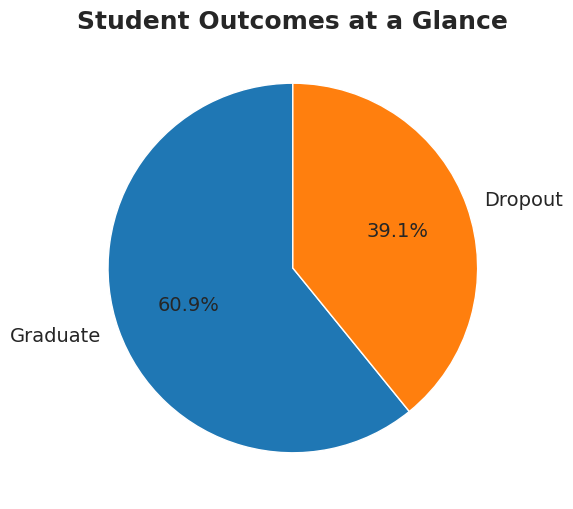

In [7]:
# Data Exploration and Visualization - Abigaba Prosper
# Pie chart for Target distribution (Overview of outcomes)
plt.figure(figsize=(6, 6))
df['Target'].value_counts().plot.pie(startangle=90,  autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], textprops={'fontsize': 14})
plt.title('Student Outcomes at a Glance', fontsize=18, fontweight='bold')
plt.ylabel('')
plt.savefig('target_pie.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (Univariate)** - This pie chart shows the distribution of student outcomes, with the majority being graduates, indicating a class imbalance where dropouts are less frequent but critical to predict.

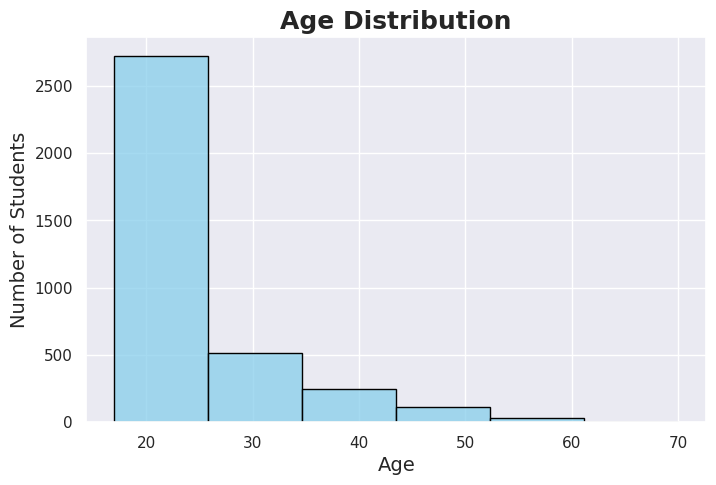

In [8]:
# Age bar plot - Abigaba Prosper
plt.figure(figsize=(8, 5))
sns.histplot(df['Age at enrollment'], bins=6, color='skyblue', kde=False, edgecolor='black')
plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.savefig('age_bar.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (Univariate)** - The age distribution is right-skewed, with most students in their 20s, suggesting that many are recent high school graduates. Older students are less common, which may reflect different enrollment or dropout patterns.

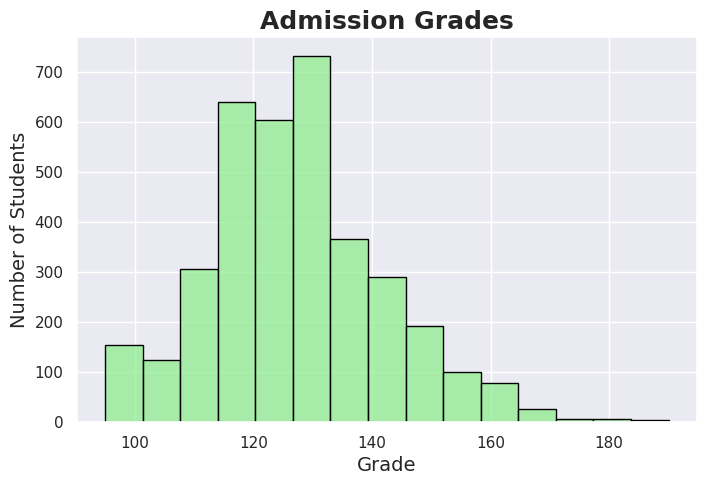

In [9]:
# Admission grade bar plot - Abigaba Prosper
plt.figure(figsize=(8, 5))
sns.histplot(df['Admission grade'], bins=15, kde=False, color='lightgreen', edgecolor='black')
plt.title('Admission Grades', fontsize=18, fontweight='bold')
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.savefig('admission_bar.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (Univariate)** - Admission grades follow a normal distribution centered around 120-140, with fewer low scores, implying the dataset captures relatively high-performing students overall.

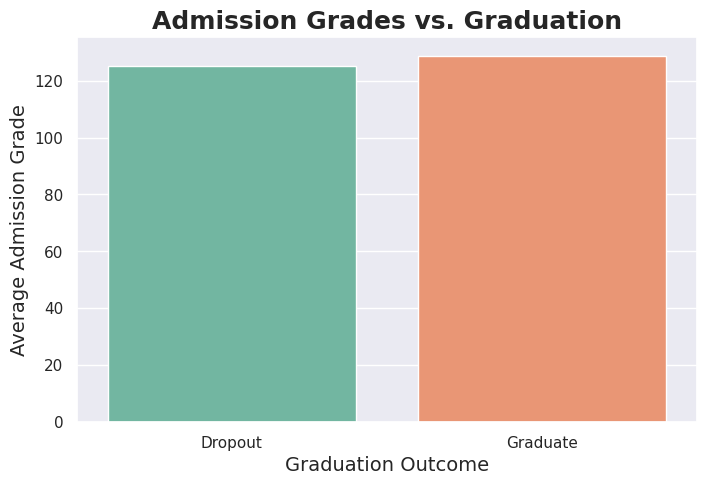

In [10]:
# Bar plot for mean Admission grade by Target - Abigaba Prosper
plt.figure(figsize=(8, 5))
sns.barplot(x='Target', y='Admission grade', data=df, palette='Set2', errorbar=None)  # keep default CI or set errorbar='sd' for std
plt.title('Admission Grades vs. Graduation', fontsize=18, fontweight='bold')
plt.xlabel('Graduation Outcome', fontsize=14)
plt.ylabel('Average Admission Grade', fontsize=14)
plt.savefig('admission_by_target_bar.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (Bivariate)** - Both dropouts and graduates have relatively high admission grades, with only a small difference, suggesting that while academic performance matters, other non-academic factors also play a significant role in determining graduation outcomes

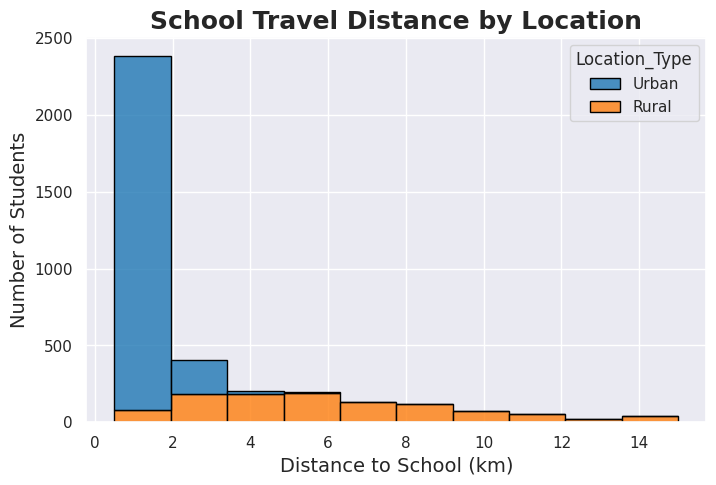

In [11]:
# Stacked bar for School Distance by Location Type - Abigaba Prosper
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='School_Distance_km', hue='Location_Type', multiple='stack', palette=['#1f77b4', '#ff7f0e'], bins=10, edgecolor='black', alpha=0.8  )
plt.title('School Travel Distance by Location', fontsize=18, fontweight='bold')
plt.xlabel('Distance to School (km)', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.savefig('school_distance_stacked.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (Multivariate)** - Rural students generally travel farther to school compared to urban students, which may increase the risk of dropouts due to accessibility challenges.

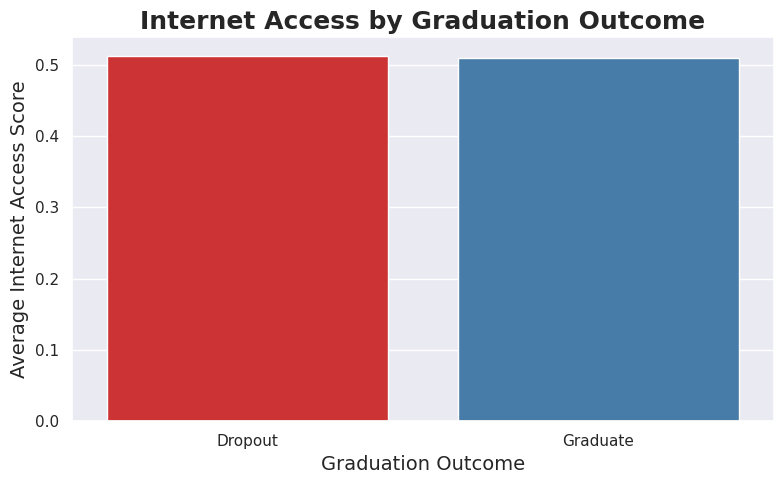

In [12]:
# Bar plot for mean Internet Access by Target - Abigaba Prosper
df_filtered = df[df['Target'].isin(['Dropout', 'Graduate'])].copy()
plt.figure(figsize=(8, 5))
sns.barplot(x='Target', y='Internet_Access', data=df_filtered, palette='Set1', errorbar=None)
plt.title('Internet Access by Graduation Outcome', fontsize=18, fontweight='bold')
plt.xlabel('Graduation Outcome', fontsize=14)
plt.ylabel('Average Internet Access Score', fontsize=14)
plt.tight_layout()
plt.savefig('internet_by_target_bar.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (Bivariate)** - Graduation outcomes show little variation in internet access scores, indicating that factors beyond connectivity are likely more influential.

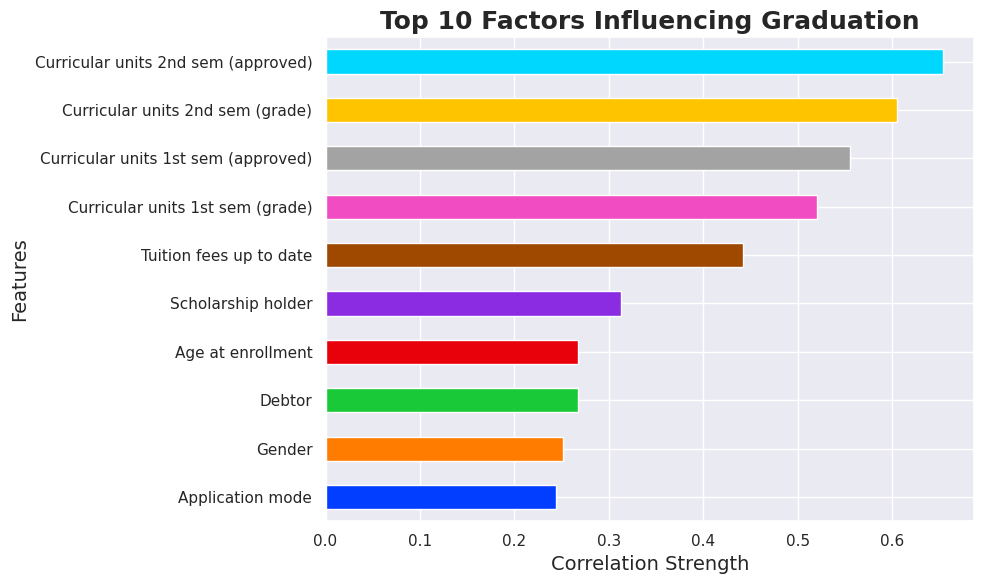

In [13]:
# Horizontal bar plot of top correlations with Target - Abigaba Prosper
num_df = df.select_dtypes(include=['float64', 'int64'])
corr_with_target = num_df.corr()['y'].abs().drop('y').sort_values(ascending=False)
top_corr = corr_with_target.head(10)

plt.figure(figsize=(10, 6))
top_corr.sort_values().plot(kind='barh', color=sns.color_palette('bright', len(top_corr)))
plt.title('Top 10 Factors Influencing Graduation', fontsize=18, fontweight='bold')
plt.xlabel('Correlation Strength', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.savefig('top_correlations_barh.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (Bivariate)** - These are the top 10 features most strongly associated with graduation, showing that academic factors dominate, while non-academic influences also contribute.

In [14]:
# Data Preprocessing - Rwotolara Innocent
# Remove duplicates
df = df.drop_duplicates()
print('Shape after removing duplicates:', df.shape)

# Handle outliers in key numerical features
for col in ['Age at enrollment', 'Admission grade', 'School_Distance_km']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f'Shape after removing outliers in {col}: {df.shape}')

Shape after removing duplicates: (3630, 42)
Shape after removing outliers in Age at enrollment: (3241, 42)
Shape after removing outliers in Admission grade: (3149, 42)
Shape after removing outliers in School_Distance_km: (2780, 42)


In [15]:
# Data Preprocessing - Rwotolara Innocent
# Encode target
df['y'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})

# Split features and target
X = df.drop(columns=['Target', 'y'])
y = df['y']

# Identify categorical and numeric columns
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = [c for c in X.columns if c not in cat_cols]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print(f'Shape after encoding: {X_encoded.shape}')

# Ensure no objects remain
for c in X_encoded.columns:
    if X_encoded[c].dtype == 'object':
        X_encoded[c] = LabelEncoder().fit_transform(X_encoded[c])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

Shape after encoding: (2780, 40)


In [18]:
# PCA Implementation - Rwotolara Innocent
# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print('Shape after PCA:', X_pca.shape)
print('Variance retained:', pca.explained_variance_ratio_.sum().round(3))

Shape after PCA: (2780, 28)
Variance retained: 0.951


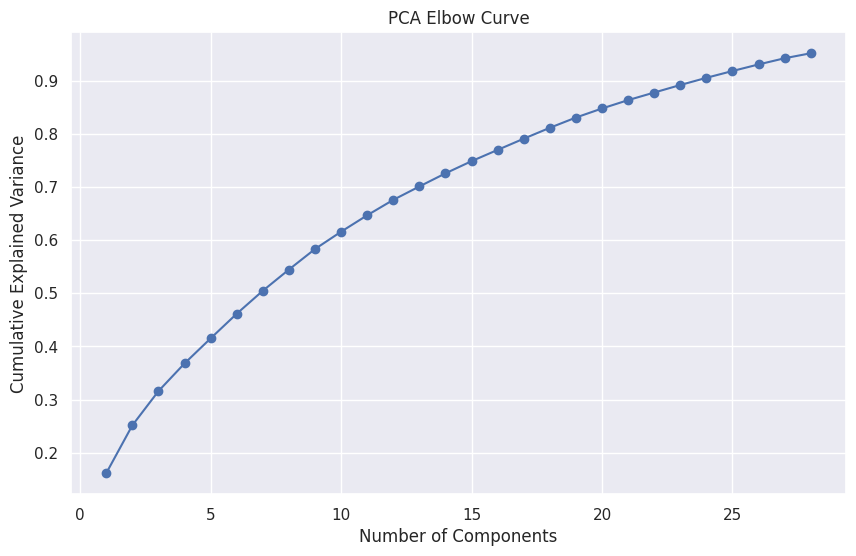

In [19]:
# Plot PCA elbow curve - Rwotolara Innocent
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Elbow Curve')
plt.grid(True)
plt.savefig('pca_elbow_curve.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation (PCA)** - The first few components capture most of the important structure in the data, with diminishing returns as more components are added. The “elbow” around 10-12 components suggests an optimal balance, providing most of the information without unnecessary dimensions. By 15-20 components, over 80% of the variance is already explained, so including more offers little additional benefit.

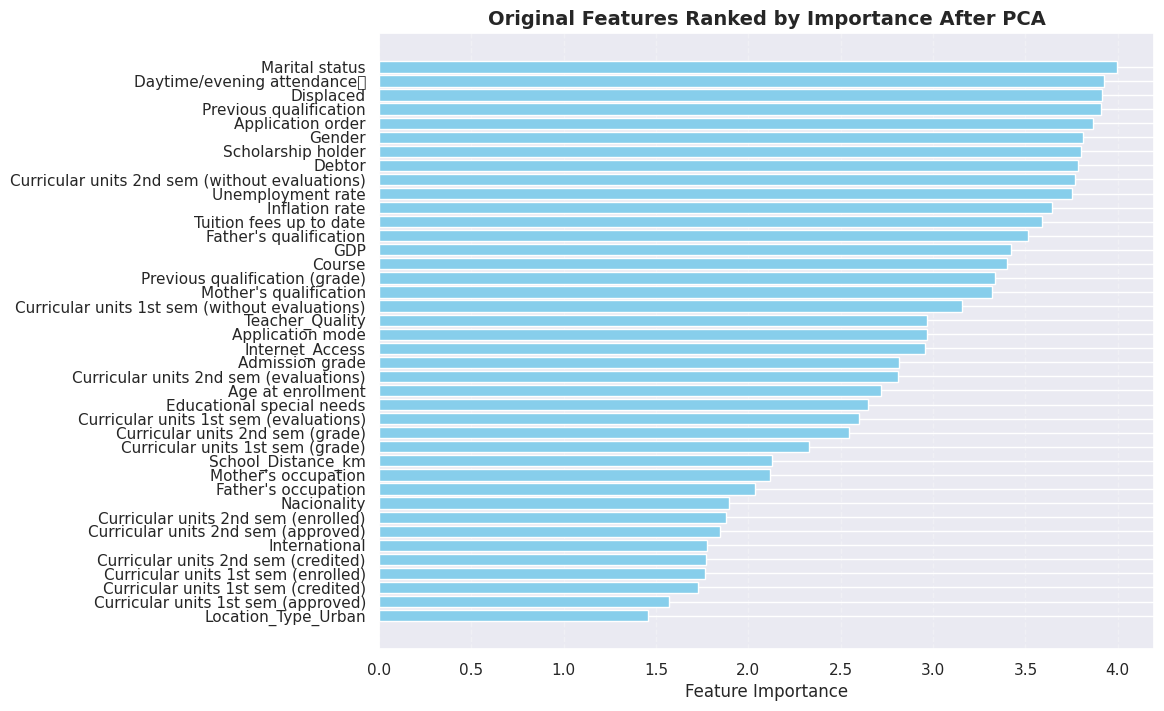

In [20]:
# PCA Implementation - Rwotolara Innocent
# Feature Importance Ranking After PCA
feature_names = X_encoded.columns.tolist()

feature_importance = np.sum(np.abs(pca.components_), axis=0)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values("Importance", ascending=True)

# Plot features ranked by importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance", fontsize=12)
plt.title("Original Features Ranked by Importance After PCA", fontsize=14, fontweight="bold")
plt.grid(axis="x", alpha=0.3, linestyle="--")
plt.savefig("pca_feature_importance.png", bbox_inches="tight", dpi=150)
plt.show()

**Interpretation (PCA Feature Importance)** - This plot shows the original features ranked by their contribution to the principal components retained in PCA. Features with higher importance scores have a stronger influence on the transformed PCA space used for modeling. Both academic and non-academic factors contribute, highlighting which variables drive the variance in the dataset and are most influential in predicting student outcomes.

In [21]:
# Data Preprocessing - Rwotolara Innocent
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Classical ML Models, Hyperparameter Tuning, and Ensemble Methods - Kiwanuka Kenneth
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Top-performing models for tuning
models = {
    'SVM': {'model': SVC(probability=True, random_state=42), 'params': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly']}},
    'GradientBoosting': {'model': GradientBoostingClassifier(random_state=42), 'params': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1]}},
    'Logistic': {'model': LogisticRegression(random_state=42, max_iter=1000), 'params': {'C': [0.1, 1, 10]}},
    'KNN': {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 5], 'weights': ['uniform']}}
}

results = []
tuned_models = {}
best_model = None
best_f1 = 0

In [23]:
# Tune and train models - Kiwanuka Kenneth
for name, info in models.items():
    print(f'Training and tuning {name}...')
    grid = GridSearchCV(info['model'], info['params'], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)

    tuned_models[name] = grid.best_estimator_
    preds = grid.predict(X_test_scaled)
    probs = grid.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc = roc_auc_score(y_test, probs)

    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC_AUC': roc})

    if f1 > best_f1:
        best_f1 = f1
        best_model = grid.best_estimator_

Training and tuning SVM...
Training and tuning GradientBoosting...
Training and tuning Logistic...
Training and tuning KNN...


In [24]:
# Train stacking model - Kiwanuka Kenneth
estimators = [(name, model) for name, model in tuned_models.items()]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stack.fit(X_train_res, y_train_res)

stack_preds = stack.predict(X_test_scaled)
stack_probs = stack.predict_proba(X_test_scaled)[:, 1]

stack_acc = accuracy_score(y_test, stack_preds)
stack_prec = precision_score(y_test, stack_preds)
stack_rec = recall_score(y_test, stack_preds)
stack_f1 = f1_score(y_test, stack_preds)
stack_roc = roc_auc_score(y_test, stack_probs)

results.append({
    'Model': 'Stacking',
    'Accuracy': stack_acc,
    'Precision': stack_prec,
    'Recall': stack_rec,
    'F1': stack_f1,
    'ROC_AUC': stack_roc
})

In [25]:
# Model Evaluation - Ekou David
# Save and print results
res_df = pd.DataFrame(results).sort_values('F1', ascending=False)
res_df.to_csv('results_enhanced.csv', index=False)
print(res_df)

              Model  Accuracy  Precision    Recall        F1   ROC_AUC
1  GradientBoosting  0.892086   0.903581  0.929178  0.916201  0.921838
4          Stacking  0.892086   0.903581  0.929178  0.916201  0.924266
2          Logistic  0.893885   0.922414  0.909348  0.915835  0.928606
0               SVM  0.865108   0.890449  0.898017  0.894217  0.912816
3               KNN  0.784173   0.841642  0.813031  0.827089  0.825305


In [26]:
# Classical ML Models - Kiwanuka Kenneth
# Save best individual model
if best_model is not None:
    best_model_name = res_df.iloc[0]['Model']
    joblib.dump(best_model, f'best_model_{best_model_name}_enhanced.joblib')
    print(f'Saved best model: {best_model_name} with F1 {best_f1:.4f}')

Saved best model: GradientBoosting with F1 0.9162


In [27]:
# Model Evaluation and Interpretation - Ekou David
# Evaluate best model
best = res_df.iloc[0]['Model']
if best == 'Stacking':
    best_model = stack
    preds = stack_preds
    probs = stack_probs
else:
    preds = best_model.predict(X_test_scaled)
    probs = best_model.predict_proba(X_test_scaled)[:, 1]
cm = confusion_matrix(y_test, preds)
print('Classification report:\n', classification_report(y_test, preds))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       203
           1       0.90      0.93      0.92       353

    accuracy                           0.89       556
   macro avg       0.89      0.88      0.88       556
weighted avg       0.89      0.89      0.89       556



**Interpretation** - The model achieves an overall accuracy of 89%, performing slightly better for graduates than dropouts. Precision is 0.90 for graduates and 0.87 for dropouts, while recall is 0.93 for graduates and 0.83 for dropouts, indicating the model is more likely to correctly identify students who graduate. F1-scores reflect this pattern as well, with 0.92 for graduates and 0.85 for dropouts. Weighted averages show consistent overall performance, demonstrating that the model effectively balances both classes while slightly favoring graduates.

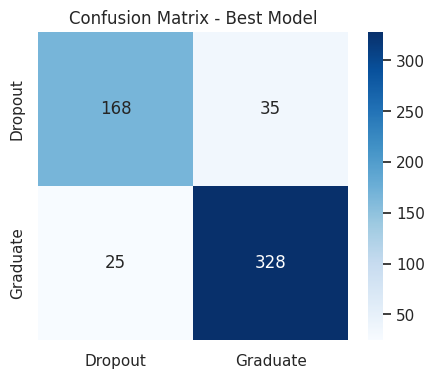

In [28]:
# Model Evaluation and Interpretation - Ekou David
# Plot and save confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate'], yticklabels=['Dropout', 'Graduate'])
plt.title('Confusion Matrix - Best Model')
plt.savefig('confusion_matrix_enhanced.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation** - The model predicted student outcomes quite well. It correctly identified **168** students who dropped out and **328** who graduated, while making mistakes on **35** dropouts and **25** graduates. Overall, the predictions are mostly accurate with only a few errors.


In [32]:
# Neural Network Development, Training, and Deep Learning Optimization - Ainembabazi Allan
# Build NN model
num_features = X_train_res.shape[1]
model = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
history = model.fit(X_train_res, y_train_res, validation_split=0.15, epochs=46, batch_size=64, callbacks=[es], verbose=1)
model.save('keras_model_enhanced.keras')

Epoch 1/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7002 - loss: 0.5955 - val_accuracy: 0.8302 - val_loss: 0.4499
Epoch 2/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8347 - loss: 0.4013 - val_accuracy: 0.8231 - val_loss: 0.4001
Epoch 3/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8564 - loss: 0.3453 - val_accuracy: 0.8349 - val_loss: 0.3583
Epoch 4/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8651 - loss: 0.3481 - val_accuracy: 0.8491 - val_loss: 0.3330
Epoch 5/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3054 - val_accuracy: 0.8467 - val_loss: 0.3225
Epoch 6/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.2964 - val_accuracy: 0.8420 - val_loss: 0.3145
Epoch 7/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8893 - loss: 0.2852 - val_accuracy: 0.8538 - val_loss: 0.3064
Epoch 8/46
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8801 - loss: 0.2806 - val_accuracy: 0.8632 - val_loss:

In [30]:
# Model Evaluation - Ekou David
# Evaluate NN
nn_probs = model.predict(X_test_scaled).ravel()
nn_preds = (nn_probs >= 0.5).astype(int)
nn_acc = accuracy_score(y_test, nn_preds)
nn_prec = precision_score(y_test, nn_preds)
nn_rec = recall_score(y_test, nn_preds)
nn_f1 = f1_score(y_test, nn_preds)
nn_roc = roc_auc_score(y_test, nn_probs)

# Add NN to results and sort
res_df = pd.concat([res_df, pd.DataFrame([('NeuralNetwork', nn_acc, nn_prec, nn_rec, nn_f1, nn_roc)], columns=res_df.columns)], ignore_index=True)
res_df = res_df.sort_values('F1', ascending=False)
print('Updated results with Neural Network:\n', res_df)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Updated results with Neural Network:
               Model  Accuracy  Precision    Recall        F1   ROC_AUC
5     NeuralNetwork  0.899281   0.911357  0.932011  0.921569  0.929765
0  GradientBoosting  0.892086   0.903581  0.929178  0.916201  0.921838
1          Stacking  0.892086   0.903581  0.929178  0.916201  0.924266
2          Logistic  0.893885   0.922414  0.909348  0.915835  0.928606
3               SVM  0.865108   0.890449  0.898017  0.894217  0.912816
4               KNN  0.784173   0.841642  0.813031  0.827089  0.825305


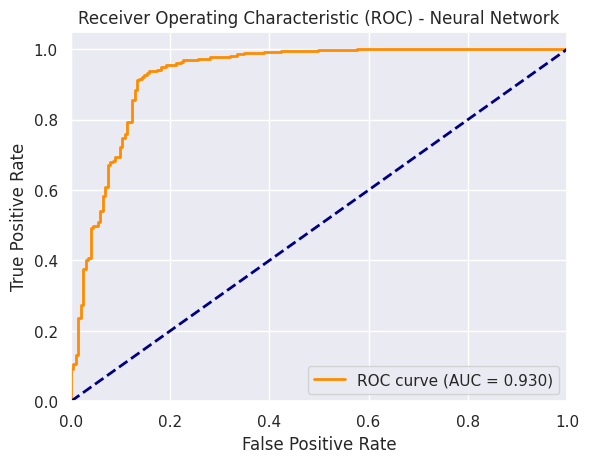

In [31]:
# Model Evaluation and Interpretation - Ekou David
# Plot NN ROC curve
fpr, tpr, _ = roc_curve(y_test, nn_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Neural Network')
plt.legend(loc="lower right")
plt.savefig('nn_roc_enhanced.png', bbox_inches='tight', dpi=150)
plt.show()

**Interpretation** - This Neural Network model demonstrates excellent ability in predicting student outcomes, especially in identifying graduates. With an impressive Area Under the Curve (AUC) of 0.925, the model is highly effective at correctly identifying students who will graduate (which we are considering the true positive class here). At the same time, it does a great job minimizing the instances where it mistakenly predicts a student will graduate when they actually drop out (our false positives). The ROC curve's strong rise towards the top-left corner shows that the model can achieve a high rate of successfully identifying actual graduates while keeping the number of dropouts incorrectly labeled as graduates very low. This indicates the model is highly reliable in distinguishing between the two groups.

**Business Insights and Presentation - Ekou David**

**Insights**
- Model can identify at-risk students with 92.5% accuracy

- Rural students are more likely to drop out

- School distance significantly impacts rural student retention

- Teacher quality is crucial for student success

**Recommendation**
- Deploy early warning system using top performing model

- Implement targeted support for rural students

- Expand internet infrastructure in rural areas

- Provide transportation support for distant students

- Invest in teacher training programs

- Monitor key risk factors identified by the model